# Operadores Morfológicos

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
img = load_img()

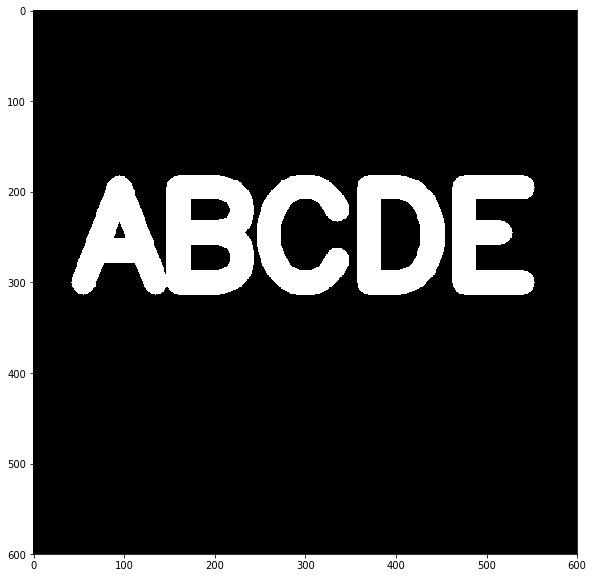

In [5]:
display_img(img)

## Erosión

Erosiona los límites de los objetos en primer plano. Los mejores resultados se logran cuando el primer plano es un color claro (preferentemente blanco) y el fondo es oscuro.

In [8]:
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 1)

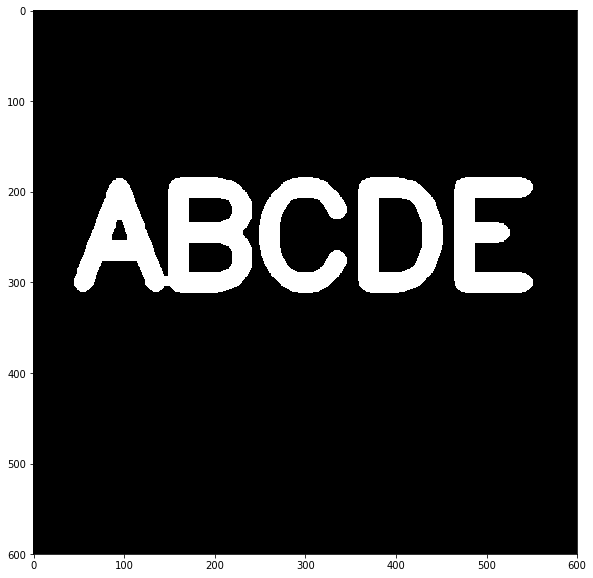

In [9]:
display_img(erosion1)

In [10]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
erosion5 = cv2.erode(img,kernel,iterations = 4)

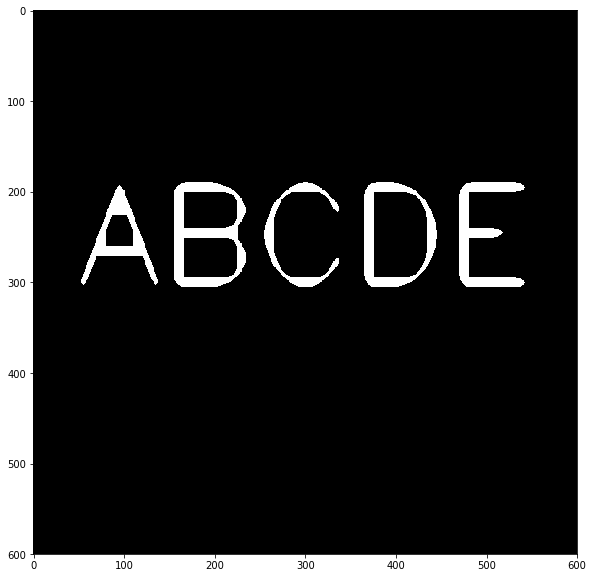

In [11]:
display_img(erosion5)

## Apertura
Apertura es erosión seguido por dilatación. Es útil para eliminar ruido en el fondo.

In [12]:
img = load_img()

In [13]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [14]:
white_noise

array([[0, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 1]])

In [15]:
white_noise = white_noise*255

In [16]:
white_noise.shape

(600, 600)

In [17]:
img.shape

(600, 600)

In [18]:
noise_img = white_noise+img

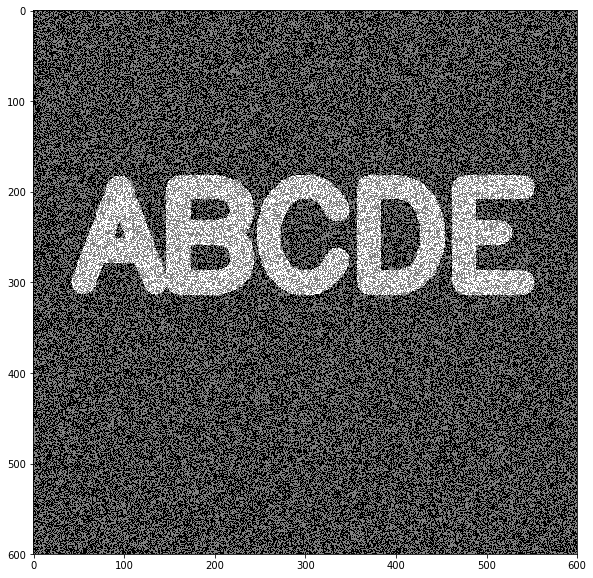

In [19]:
display_img(noise_img)

In [20]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

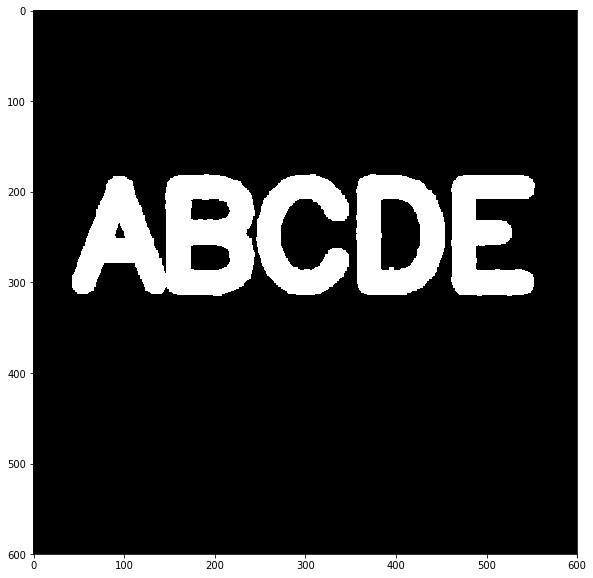

In [21]:
display_img(opening)

### Clausura
Útil en remover ruido de objetos en primer plano, como por ejemplo puntos negros encima de texto blanco.

In [22]:
img = load_img()

In [23]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [24]:
black_noise

array([[0, 0, 0, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 1, 1]])

In [25]:
black_noise= black_noise * -255

In [26]:
black_noise_img = img + black_noise

In [27]:
black_noise_img

array([[   0.,    0.,    0., ..., -255., -255.,    0.],
       [-255., -255.,    0., ...,    0., -255., -255.],
       [   0.,    0.,    0., ..., -255., -255., -255.],
       ...,
       [-255.,    0.,    0., ...,    0.,    0., -255.],
       [   0.,    0.,    0., ...,    0., -255.,    0.],
       [   0., -255., -255., ..., -255., -255., -255.]])

In [28]:
black_noise_img[black_noise_img==-255] = 0

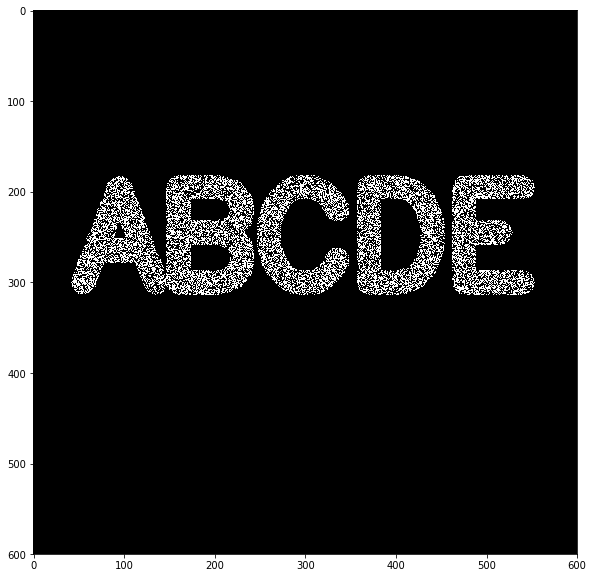

In [29]:
display_img(black_noise_img)

In [30]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

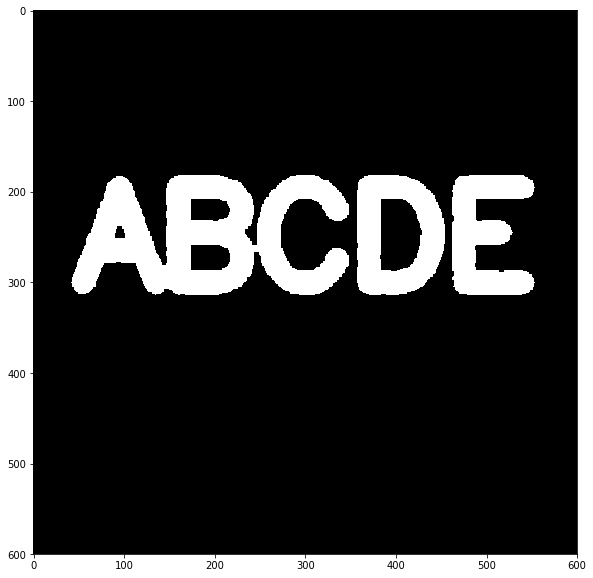

In [31]:
display_img(closing)

## Gradiente Morfológico

Es la diferencia entre dilatación y erosión de una imagen.

In [32]:
img = load_img()

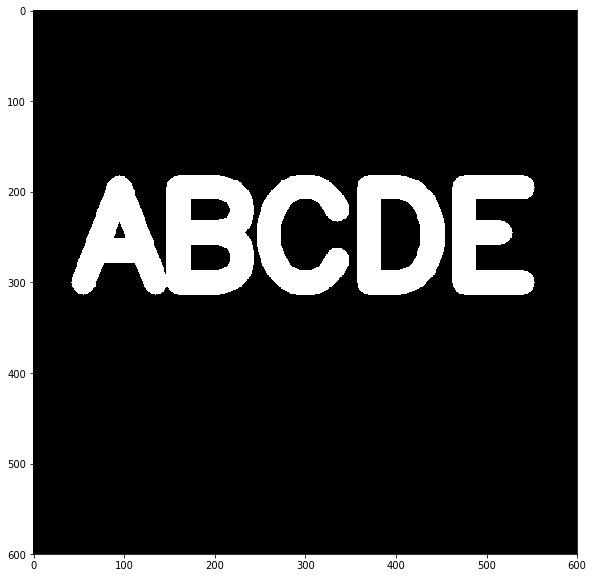

In [33]:
display_img(img)

In [34]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

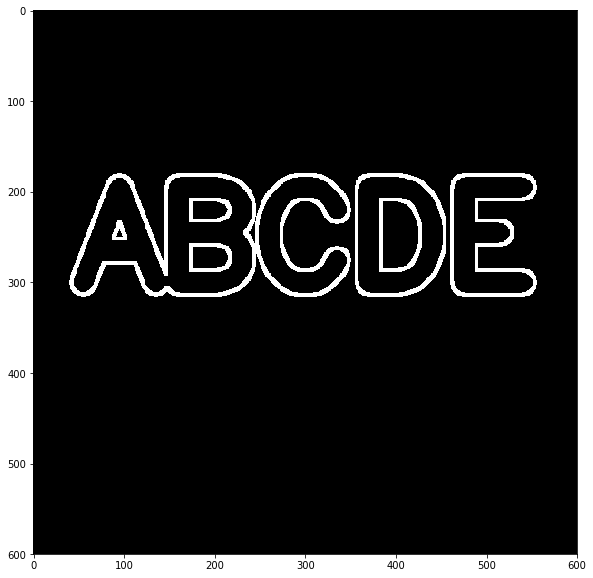

In [35]:
display_img(gradient)